In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [61]:
import seaborn as sn
import pandas as pd

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [24]:
X_train = X_train / 255
X_test = X_test / 255

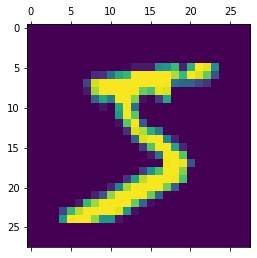

In [25]:
plt.matshow(X_train[0]);

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28* 28)

In [28]:
X_train_flattened.shape

(60000, 784)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [33]:
history = model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2430 - accuracy: 0.9323
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2424 - accuracy: 0.9331
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2412 - accuracy: 0.9337
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2399 - accuracy: 0.9341
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2400 - accuracy: 0.9335


In [37]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 965us/step - loss: 0.2705 - accuracy: 0.9273


[0.27048125863075256, 0.927299976348877]

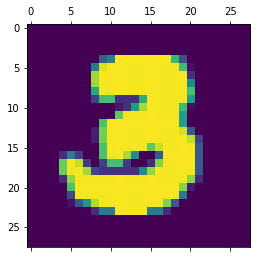

In [41]:
plt.matshow(X_test[200]);

In [42]:
y_preds = model.predict(X_test_flattened)
np.argmax(y_preds[200])

313/313 [==============================] - 0s 1ms/step


3

In [43]:
y_preds_labels = [np.argmax(i) for i in y_preds]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_labels)

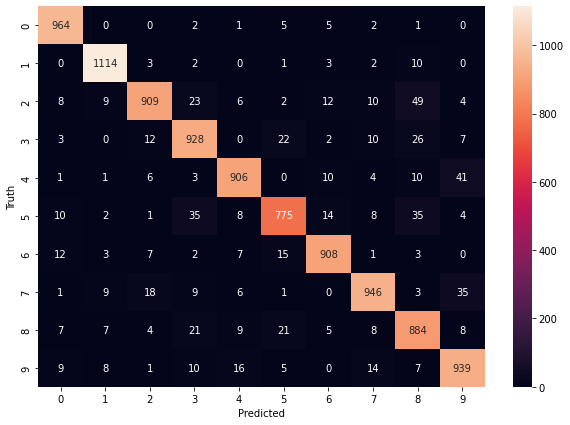

In [53]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth");

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0522 - accuracy: 0.9840


In [52]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0816 - accuracy: 0.9737


[0.0815613716840744, 0.9736999869346619]

313/313 [==============================] - 0s 1ms/step


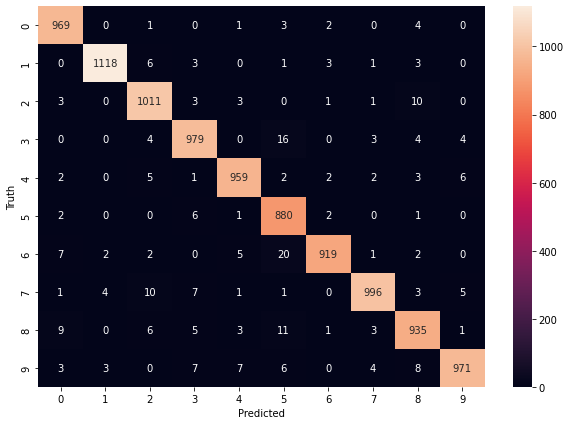

In [54]:
y_preds = model.predict(X_test_flattened)
np.argmax(y_preds[200])
y_preds_labels = [np.argmax(i) for i in y_preds]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth");

In [73]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='sigmoid'),
])
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

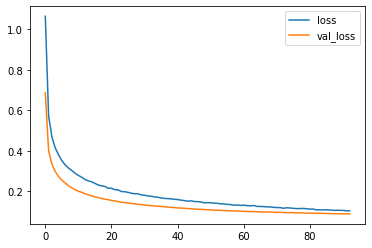

In [74]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

313/313 [==============================] - 1s 1ms/step


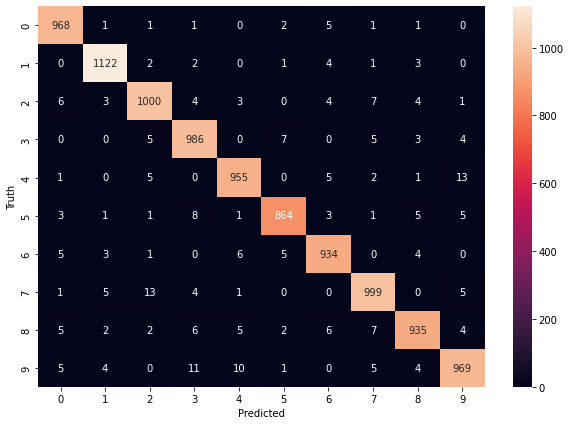

In [76]:
y_preds = model.predict(X_test)
np.argmax(y_preds[200])
y_preds_labels = [np.argmax(i) for i in y_preds]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth");